In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sc
SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
LC3 = np.array([2,1,12,6,5,3,1,15,6,22,5,34,19,36,27,38,55,8,23,3,3,1,2])
DNA = np.array([514,545,1522,912,586,634,1158,1033,521,706,608,1699,245,552,969,2256,1527,408,4342,627,592,499,986])
mtvol = np.array([257,244,1104,519,451,299,1099,774,282,263,279,1379,129,271,403,1421,1069,153,2039,246,346,192,392])
cellvol = np.array([11900,10300,32200,12900,10900,9188,14700,14400,6930,5115,16900,68600,3945,19700,18800,60200,115000,8017,59800,8091,6256,4881,9625])

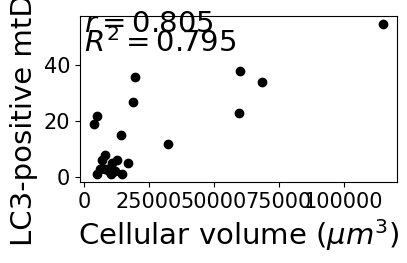

In [3]:
plt.figure(figsize = (4.5,3))
plt.scatter(cellvol, LC3, color = "black")
plt.xlabel("Cellular volume $(\mu m^3)$")
plt.ylabel("LC3-positive mtDNA")
mod = sm.OLS(LC3, cellvol)
fii = mod.fit()
r2 = round(fii.rsquared, 3)
rho = round(sc.pearsonr(cellvol,LC3)[0],3)
plt.text(0,52,r'$r = $' +str(rho))
plt.text(0,45,r'$R^2 = $' +str(r2))
plt.tight_layout()
plt.savefig("LC3_cellvol", dpi = 300)

0.0190129790971265


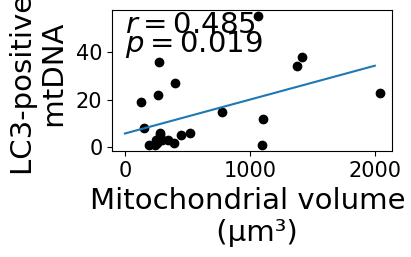

In [10]:
plt.figure(figsize = (4.5,3))
plt.scatter(mtvol, LC3, color = "black")
plt.xlabel("Mitochondrial volume \n (μm³)")
plt.ylabel("LC3-positive \n mtDNA")
mod = sm.OLS(LC3, np.array([np.ones(len(mtvol)), mtvol]).transpose())
fii = mod.fit()
r2 = round(fii.rsquared, 3)
rho = round(sc.pearsonr(mtvol,LC3)[0],3)
p = round(sc.pearsonr(mtvol,LC3)[1],3)
plt.text(0,48,r'$r = $' +str(rho))
plt.text(0,40,r'$p = $' +str(p))
plt.plot(np.array([0,2000]), fii.params[0] + fii.params[1]*np.array([0,2000]))
plt.tight_layout()
plt.savefig("subpanels/LC3_mtvol.pdf")
print(sc.pearsonr(mtvol,LC3)[1])